In [1]:
# OBJECTIVE Rank players by market value and Predict OVA #
# What Key Skills are most related to having a highest OVA'

# Import Libraries
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read Data

datafile = pd.read_csv("./Desktop/IRONHACK/data_mid_bootcamp_project_FIFA_MoneyBall/FIFA21_male2.csv")


/var/folders/9s/8zwnqlfj67q_bn55bt56gkcw0000gn/T/ipykernel_48792/3798509330.py:3: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  datafile = pd.read_csv("./Desktop/IRONHACK/data_mid_bootcamp_project_FIFA_MoneyBall/FIFA21_male2.csv")


In [3]:
# Preview Data

datafile.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [4]:
# Remove columns containing links and Gender as won't be necessary

datafile.drop(['Flag Photo', 'Club Logo', 'Player Photo'], axis=1, inplace=True)

In [5]:
# Preview Data

datafile.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [6]:
# Drop the columns not necessary like Gender & Loan End Date 

datafile.drop('Loan Date End', axis=1, inplace=True)


In [7]:
datafile.drop('Gender', axis=1, inplace=True)

In [8]:
# Dropping further columns to make data easier to work with

datafile.drop(['LF', 'CF', 'RF', 'LAM', 'CAM', 'RAM', 'LM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB','RCB', 'RB', 'GK', 'LCM','W/F', 'SM', 'A/W','D/W', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'LS', 'ST', 'RS', 'LW', 'RW'], axis=1, inplace=True)


In [9]:
#Standardise data columns

cols = [datafile.columns[i].lower().replace(' ', '_') for i in range(len(datafile.columns))]

In [ ]:
# Preview Data

datafile.head()

In [11]:
# Dropping even more columns further columns to make data easier to work with - now I have a select set to examine

datafile.drop(['GK Diving', 'GK Handling', 'GK Kicking', 'GK Handling', 'GK Diving', 'Sliding Tackle', 'Standing Tackle', 'Marking', 'Defending', 'Penalties', 'Composure', 'Vision', 'Positioning', 'Interceptions', 'Goalkeeping', 'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base Stats', 'Aggression', 'Mentality', 'Long Shots'], axis=1, inplace=True)


In [28]:
# Dropping all the further columns I don't want to consider for the purpose of this analysis

datafile.drop(['Name', 'Nationality', 'Club', 'BP', 'Position', 'Team & Contract', 'Height', 'Weight', 'foot', 'Joined', 'Value', 'Release Clause', 'Contract'], axis=1, inplace=True)

In [29]:
# Check for Nans

datafile.isna().sum()

ID                  0
Age                 0
OVA                 0
BOV                 0
POT                 0
Growth              0
Wage                0
Attacking           0
Crossing            0
Finishing           0
Heading Accuracy    0
Short Passing       0
Volleys             0
Skill               0
Dribbling           0
Curve               0
FK Accuracy         0
Long Passing        0
Ball Control        0
Movement            0
Acceleration        0
Sprint Speed        0
Agility             0
Reactions           0
Balance             0
Power               0
Shot Power          0
Jumping             0
Stamina             0
Strength            0
dtype: int64

In [30]:
# For purpose of this task drop all nans

datafile = datafile.dropna()

In [15]:
# Check for Data Types

datafile.dtypes

ID                    int64
Name                 object
Age                   int64
OVA                   int64
Nationality          object
Club                 object
BOV                   int64
BP                   object
Position             object
POT                   int64
Team & Contract      object
Height               object
Weight               object
foot                 object
Growth                int64
Joined               object
Value                object
Wage                 object
Release Clause       object
Contract             object
Attacking             int64
Crossing              int64
Finishing             int64
Heading Accuracy      int64
Short Passing         int64
Volleys             float64
Skill                 int64
Dribbling             int64
Curve               float64
FK Accuracy           int64
Long Passing          int64
Ball Control          int64
Movement              int64
Acceleration          int64
Sprint Speed          int64
Agility             

In [31]:
# I want to keep Wage as a main comparable feature so going to convert to numerical value

datafile['Wage'] = datafile['Wage'].replace({'€': '', ' ': '', 'K': '000'}, regex=True).astype(float).astype(int)

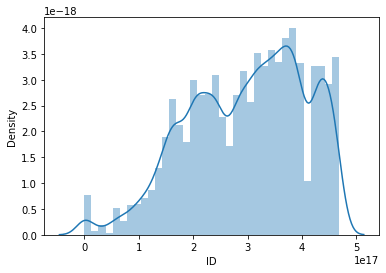

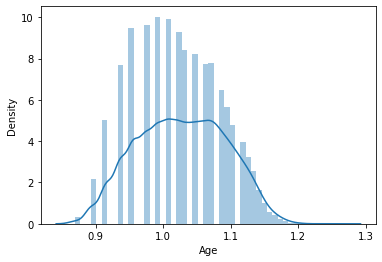

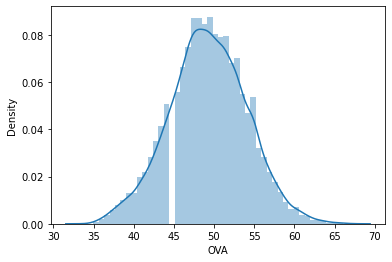

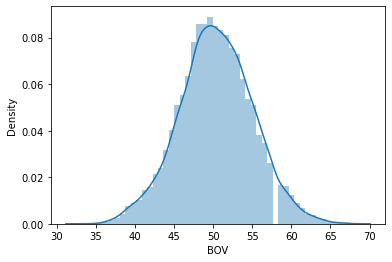

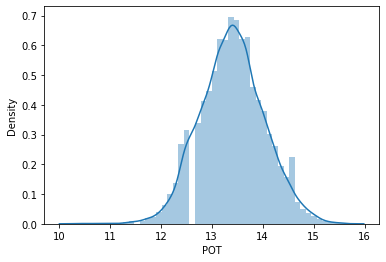

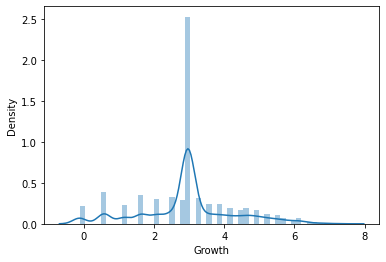

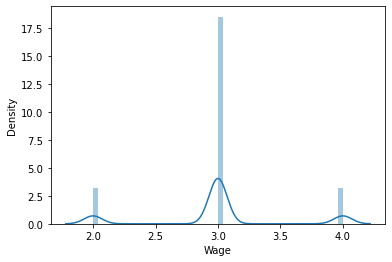

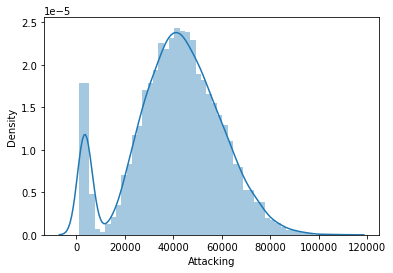

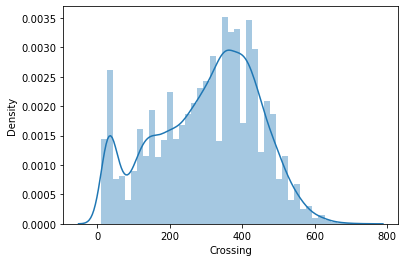

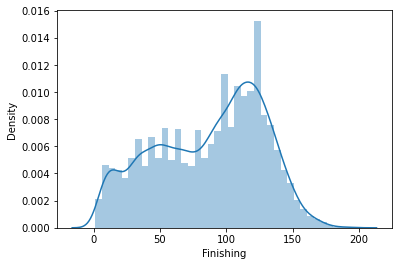

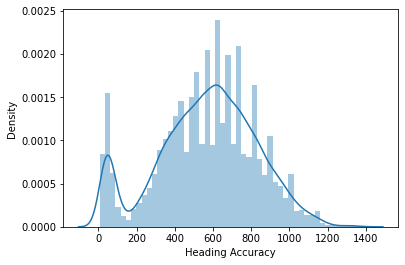

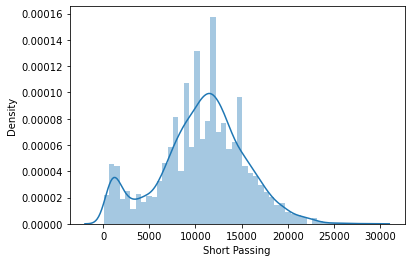

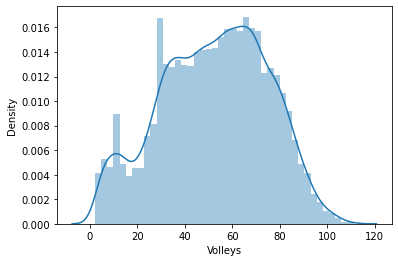

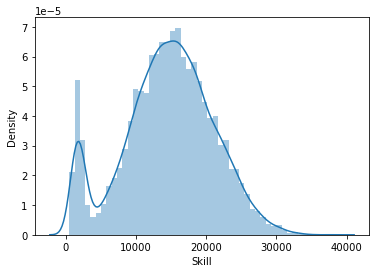

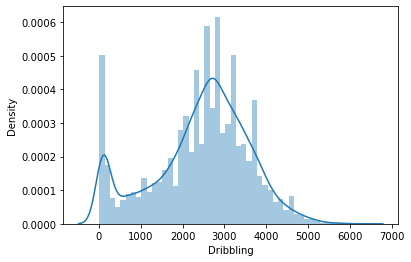

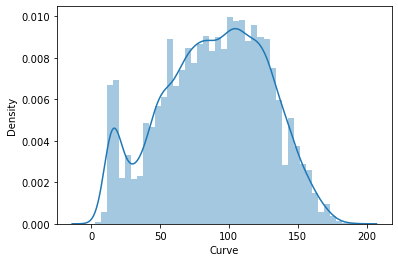

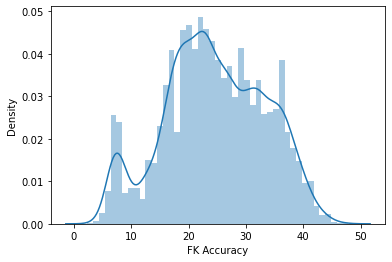

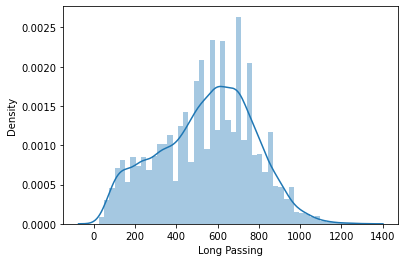

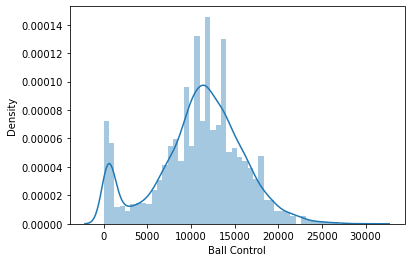

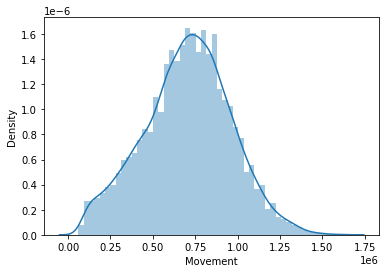

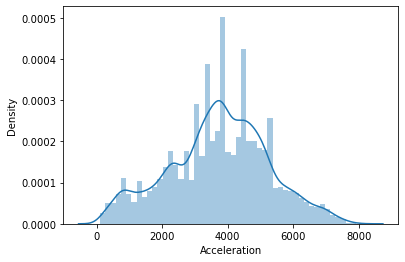

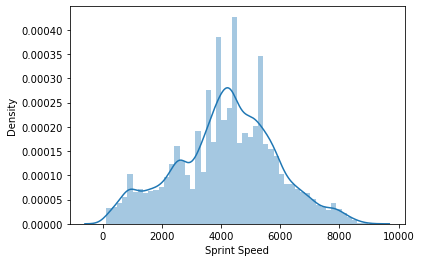

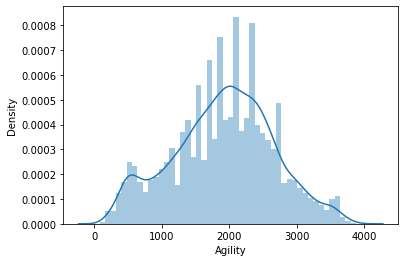

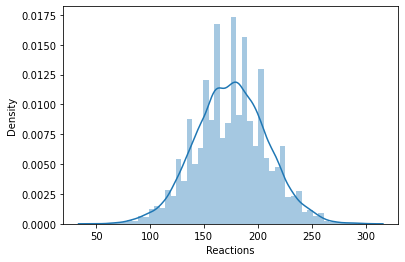

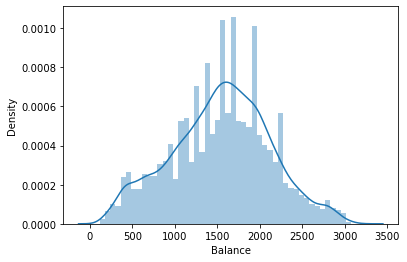

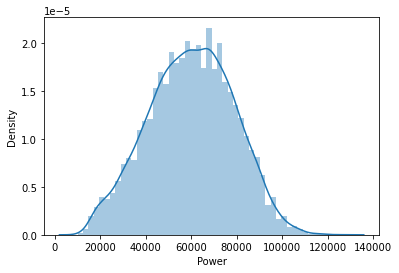

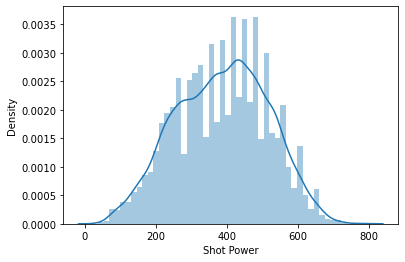

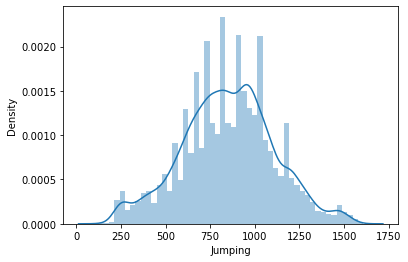

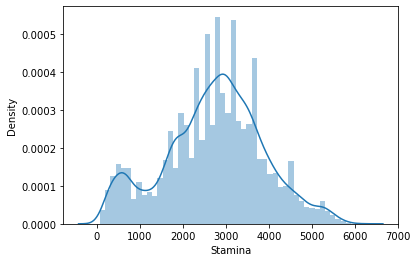

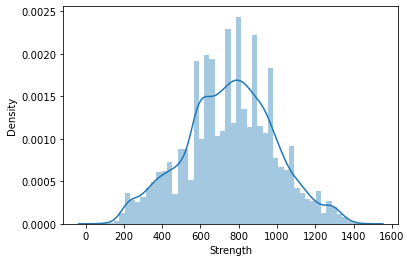

In [32]:
# Check Distributions

for column in datafile.select_dtypes(np.number).columns:
    sns.distplot(datafile[column])
    plt.show()

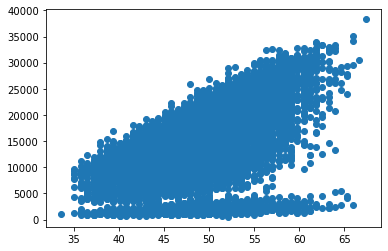

In [33]:
x = datafile['OVA']
y = datafile['Skill']

plt.scatter(x, y)
plt.show()

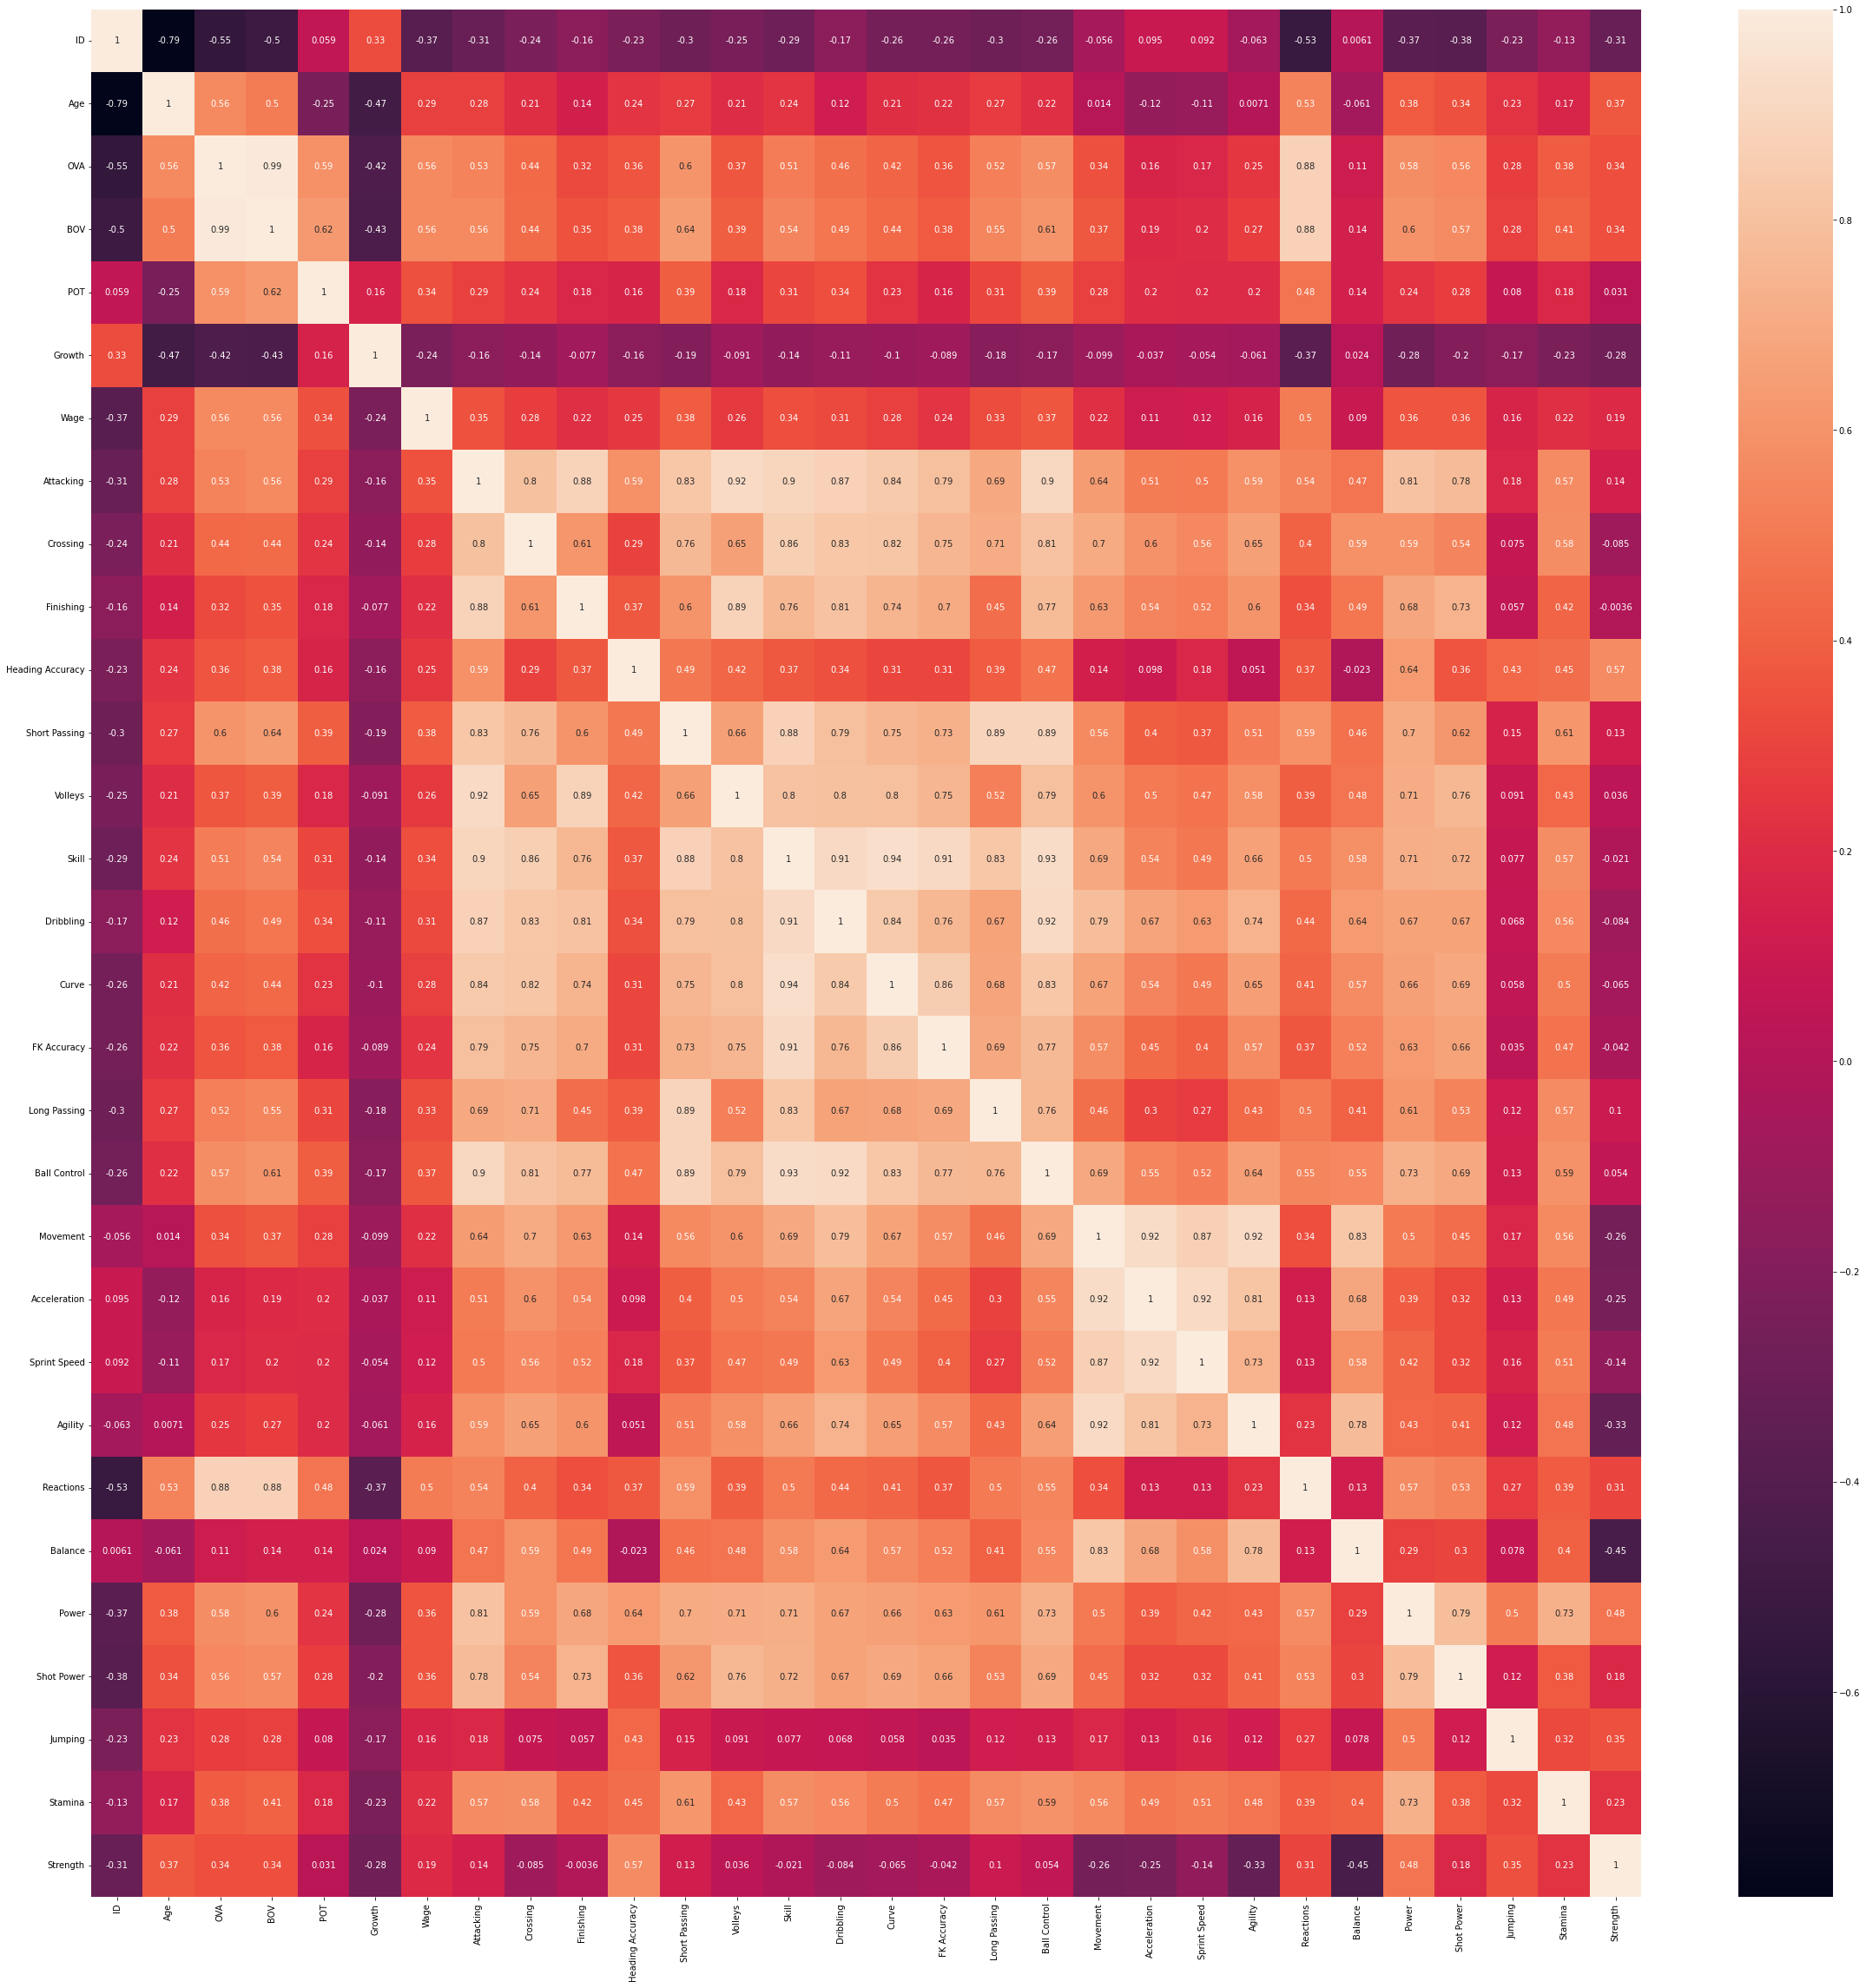

In [34]:
#Create Heatmap

mask=np.zeros_like(datafile.corr())
fig, ax = plt.subplots(figsize=(40,40))
ax = sns.heatmap(datafile.corr(),mask=mask,annot=True)
plt.show()

In [ ]:
# From Heatmap above can see that certain skills contribute to a higher OVA, Reactions being the highest value here

In [35]:
# check the correlations
mask = np.zeros_like(datafile.corr())
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0

In [36]:
datafile.head()

,ID,Age,OVA,BOV,POT,Growth,Wage,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength
0,1.759944,1.125788,50.742158,52.637987,13.014962,2.954191,3,56264.751883,512.235676,89.581523,630.992295,14530.258642,68.908389,21085.969989,3558.893839,122.020719,32.512364,784.451623,14550.867457,7.949632e+05,3790.921135,5100.872998,2009.716698,197.600213,1626.314231,77214.564830,530.029951,896.025711,3046.315757,790.462645
1,3317.223184,1.161167,52.143703,51.929111,13.239380,2.954191,3,65351.592304,439.979863,121.108389,668.184125,17177.919319,81.975213,24720.050023,3165.782642,154.604144,41.264511,823.572014,14550.867457,5.774532e+05,2505.222050,2183.920228,1676.259240,182.539715,1813.610412,67103.456999,541.292856,598.994768,2607.620382,637.949216
2,19264.464940,1.125788,52.143703,52.637987,13.239380,2.954191,3,65351.592304,566.173798,121.108389,337.433375,17739.219915,91.197149,26948.221627,4193.373133,166.531968,40.363068,784.451623,18337.846521,5.316719e+05,1802.954379,1497.390332,2187.542661,160.495889,1960.427405,51242.361464,507.760161,678.664761,506.946787,566.825373
4,78449.844024,1.152809,59.103792,60.384882,14.315506,2.954191,3,77679.747297,512.235676,132.725612,541.922325,26036.350966,96.492111,29656.107118,4881.914110,156.978094,37.173314,1074.433159,26075.480593,7.892987e+05,3006.717753,2790.927598,2697.804115,220.708807,1960.427405,56157.761206,453.603639,354.357157,2127.464244,674.806511
5,298250.791752,1.060581,48.633424,49.085282,13.127584,1.140068,3,42017.525188,371.682007,96.203783,351.727012,8835.449389,67.609282,14605.553939,2978.151659,112.951313,23.734072,364.261285,10424.842993,1.173071e+06,6893.096320,7978.651545,2436.125068,182.539715,2488.814938,63344.199257,496.754305,942.547692,2607.620382,656.270791


In [38]:
#BOX COX TRANSFORM

def boxcox_transform(datafile):
    numeric_cols = datafile.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        datafile[column] = np.where(datafile[column]<=0, np.NAN, datafile[column]) 
        datafile[column] = datafile[column].fillna(datafile[column].mean())
        transformed_data, ci = stats.boxcox(datafile[column])
        datafile[column] = transformed_data
        _ci[column] = [ci] 
    return datafile, _ci

In [ ]:
datafile, _ci = boxcox_transform(datafile)
datafile

In [42]:
# SPLITTING THE DATA

# X-y split
X = datafile.drop('OVA', axis=1)
y = datafile['OVA']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
# STARTING THE MODEL

model = LinearRegression()

# TRAINING THE MODEL
model.fit(X_train, y_train)

LinearRegression()

In [44]:
# GET PREDICTIONS
predictions = model.predict(X_test)

In [45]:
# FIND METRICS
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.8150230636910684, 1.5880507194148854, 2.063304928221418)

In [49]:
import math
from scipy.stats import boxcox
from scipy.special import inv_boxcox


results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['OVA'])
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,resid
4946,49.025870,49.984238,0.958367
531,49.727645,52.012392,2.284747
6750,47.619710,46.605117,1.014593
88,52.526359,52.627620,0.101261
16971,40.532725,41.485819,0.953094
15570,42.669177,48.756839,6.087662
12050,51.827913,50.148447,1.679466
13121,45.503728,42.834726,2.669003
16560,44.796542,39.468288,5.328254
12756,45.503728,44.630391,0.873338


In [54]:
#GET RESULTS - not 100% sure here what to look for here

results[results['true'] >= 50]

,true,pred,resid
88,52.526359,52.627620,0.101261
12050,51.827913,50.148447,1.679466
7528,58.086029,54.807302,3.278726
8058,57.393682,53.311156,4.082525
6351,54.616936,47.986131,6.630805
9548,57.393682,53.234159,4.159523
4346,54.616936,52.373417,2.243519
11028,54.616936,54.692299,0.075362
2494,56.700609,51.777618,4.922991
9603,53.920859,52.581088,1.339771


In [51]:
results.describe()

,true,pred,resid
count,4997.000000,4997.000000,4997.000000
mean,48.252562,47.293934,1.779294
std,4.799749,4.336970,1.418073
min,32.612051,33.735781,0.000458
25%,44.796542,44.278560,0.706398
50%,48.323230,47.211715,1.455496
75%,51.827913,50.141650,2.518450
max,66.340908,67.233130,11.054939


<AxesSubplot:xlabel='true', ylabel='pred'>

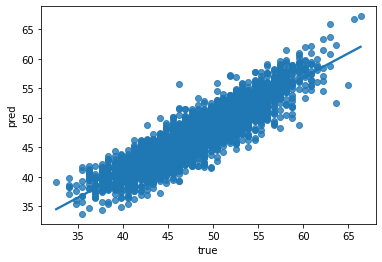

In [52]:
#PLOT 

sns.regplot(results['true'], results['pred'])